## Observações

1. Não sei se vale a pena usar os atributos diretamente. Precisamos ver quais atributos vale a pena utilizar e mudar o dataset de atributos de long pra wide antes de dar merge (fazer isso com todo o dataset da memory error).

2. Estou iniciando o preprocessamento sem utilizar os atributos, por enquanto. Aguardo sugestões sobre como podemos transformar esse dataset.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import graphlab as gl
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/graphlab/util/metric_tracker.py:12: UserWarning: The official Mixpanel Python library has moved from mixpanel-py to mixpanel. Updates will be published only to <https://pypi.python.org/pypi/mixpanel>.
  import mixpanel
[INFO] This non-commercial license of GraphLab Create is assigned to leosantospinheiro@gmail.comand will expire on September 22, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6494 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1454286913.log
[INFO] GraphLab Server Version: 1.8
[WARNING] Unable to create session in specified location: '/home/leonardo/.graphlab/artifacts'. Using: '/var/tmp/graphlab-leonardo/6494/tmp_session_b8e82d05-975f-4423-b82a-129ce24a8847'


In [2]:
%matplotlib inline

## Read

In [3]:
train_data = pd.read_csv('../data/train.csv', encoding="ISO-8859-1")
test_data = pd.read_csv('../data/test.csv', encoding="ISO-8859-1")
attribute_data = pd.read_csv('../data/attributes.csv')
descriptions = pd.read_csv('../data/product_descriptions.csv')

train_data = pd.merge(train_data, descriptions, on="product_uid", how="left")
test_data = pd.merge(test_data, descriptions, on="product_uid", how="left")

product_count = pd.DataFrame(pd.Series(train_data.groupby(["product_uid"]).size(), name="product_count"))
product_count = pd.DataFrame(pd.Series(test_data.groupby(["product_uid"]).size(), name="product_count"))

In [4]:
train_data.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [5]:
attribute_data.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [6]:
attribute_data.groupby(['name']).agg('count').sort(columns=['value'], ascending=False).head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,product_uid,value
name,,
Bullet02,86248,86248
Bullet03,86226,86226
MFG Brand Name,86250,86220
Bullet04,86174,86174
Bullet01,85940,85940


In [7]:
descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


## Merge

In [ ]:
train_data = pd.merge(train_data, product_count, left_on="product_uid", right_index=True, how="left")
test_data = pd.merge(test_data, product_count, left_on="product_uid", right_index=True, how="left")

brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
train_data = pd.merge(train_data, brand_names, on="product_uid", how="left")
train_data.brand_name.fillna("Unknown", inplace=True)
test_data = pd.merge(test_data, brand_names, on="product_uid", how="left")
test_data.brand_name.fillna("Unknown", inplace=True)

print(str(train_data.info()))
print(str(train_data.describe()))

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [23]:
attribute_data.name.unique().size

5411

In [20]:
#attribute_data.set_index(['product_uid', 'name', 'Type']).unstack('Type').reset_index()
#attribute_data.pivot_table(values='product_uid', columns='name', index=['value']) Memory error

In [4]:
#attribute_data

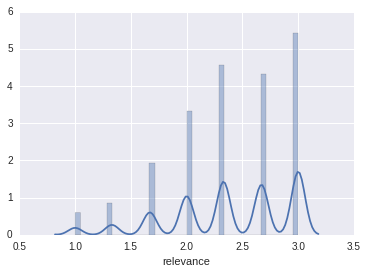

In [5]:
sns.distplot(train_data.relevance)